In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import community
from IPython.display import display

In [ ]:
#filter popularity >= 5, mov with > 100,000 votes, movie release date between 2001-2020

In [ ]:
# def filter_contain(data, col, query):
#     return data.loc[data[col] == query]

# def filter_condition(data, col, op, cond):
#     import operator
#     #~df['genres'].str.contains('Documentary')
#     #~df_movie['title'].isin(mylist)
#     # |=or, &=and   e.g. (a>1) | (b=2)
#     return data.loc[op(data[col],cond)]
# # df[df['name'].isnull()]

# def check_dupe(data, col, x='first'):
#     #keep = 'first'   show only first occurance
#     #keep = 'last'    show only last occurance
#     #keep = 'False'   keep all
#     #col= 'name' or ['name', 'city']
#     return data[data.duplicated(col,keep=x)]

# # #drop duplicate row except the first occurance
# # df = df.drop_duplicates(subset=['actor'], keep='first')

# def concat(col1, col2):
#     #df['concat'] = list(zip(df.title, df.name))
#     return list(zip(col1, col2))

# # #create new table from existing table
# # actor_table = df[['actor','name']].copy()

# # #groupby aggregate
# # test = df_crew_f1.groupby('name').agg({'name':'size'}).rename(columns={'name':'edge_count'})

#.astype(np.int64)

# plt.figure(3,figsize=(10,15)) 
# nx.draw_spring(sg,with_labels=True,font_size=15,nodelist=mydict.keys(), node_size=[v * 100000 for v in mydict.values()],font_color='r')  #,node_size=60,pos=nx.shell_layout(sg,scale=4.0))
# plt.show()

In [ ]:
#Read movie.csv
df_movie = pd.read_csv('movie.csv')
print(df_movie.shape)
df_movie.head()

(159532, 19)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,imdb_rating,imdb_votecount,title,imdb_id,tmdb_id,revenue,budget,product_country,tmdb_rating,tmdb_votecount
0,tt0016906,movie,Frivolinas,Frivolinas,0,2014,0,80,"Comedy,Musical",5.6,15.0,Frivolinas,tt0016906,400531.0,0.0,0.0,ES,0.0,0.0
1,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,0,118,"Comedy,Fantasy,Romance",6.4,78160.0,Kate & Leopold,tt0035423,11232.0,76019048.0,48000000.0,US,6.2,922.0
2,tt0062336,movie,El Tango del Viudo y Su Espejo Deformante,El Tango del Viudo y Su Espejo Deformante,0,2020,0,70,Drama,6.7,76.0,The Tango of the Widower and Its Distorting Mi...,tt0062336,602986.0,0.0,0.0,CL,4.0,1.0
3,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,0,122,Drama,6.8,5995.0,The Other Side of the Wind,tt0069049,299782.0,0.0,12000000.0,"FR,IR,US",6.8,106.0
4,tt0072306,movie,Toula ou Le génie des eaux,Toula ou Le génie des eaux,0,2017,0,90,Drama,7.0,25.0,"Toula, or the Genie of the Water",tt0072306,339338.0,0.0,0.0,"NE,DE",0.0,0.0


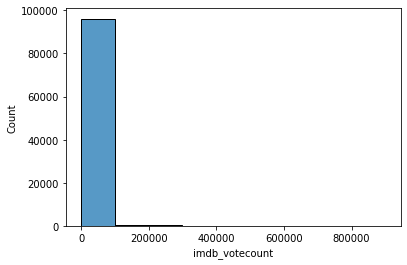

In [ ]:
#explore movie.csv dataset of the imdb_votecount ---- too many amount of movies
sns.histplot(data=df_movie, x="imdb_votecount", bins=range(0, 1000000, 100000)) 

In [ ]:
#Filter movie
#df_movie with 3 conditions: (>10000 [imdb_votecount]) & (production_country contains 'US') & (year >= year)

year = 2001     #released year of the movie to filter

df_movie_f1 = df_movie.loc[(df_movie['imdb_votecount'] > 100000) & 
                           (df_movie['product_country'].str.contains('US')) & 
                           (df_movie['startYear'] >= year)].reset_index(drop=True)

print(df_movie_f1.shape)
df_movie_f1.sort_values('imdb_votecount',ascending=False).head()

(1127, 19)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,imdb_rating,imdb_votecount,title,imdb_id,tmdb_id,revenue,budget,product_country,tmdb_rating,tmdb_votecount
383,tt0468569,movie,The Dark Knight,The Dark Knight,0,2008,0,152,"Action,Crime,Drama",9.0,2260414.0,The Dark Knight,tt0468569,155.0,1.004558e+09,185000000.0,"GB,US",8.5,23620.0
677,tt1375666,movie,Inception,Inception,0,2010,0,148,"Action,Adventure,Sci-Fi",8.8,2022432.0,Inception,tt1375666,27205.0,8.255328e+08,160000000.0,"GB,US",8.3,27532.0
1,tt0120737,movie,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Fellowship of the Ring,0,2001,0,178,"Action,Adventure,Drama",8.8,1629973.0,The Lord of the Rings: The Fellowship of the Ring,tt0120737,120.0,8.713684e+08,93000000.0,"NZ,US",8.3,17958.0
16,tt0167260,movie,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,0,2003,0,201,"Action,Adventure,Drama",8.9,1614222.0,The Lord of the Rings: The Return of the King,tt0167260,122.0,1.118889e+09,94000000.0,"NZ,US",8.5,16496.0
670,tt1345836,movie,The Dark Knight Rises,The Dark Knight Rises,0,2012,0,164,"Action,Adventure",8.4,1491132.0,The Dark Knight Rises,tt1345836,49026.0,1.081041e+09,250000000.0,US,7.7,16855.0


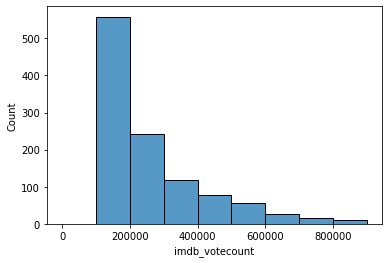

In [ ]:
# ax = sns.countplot(x="imdb_votecount", data=df_movie)
# sns.distplot(df_movie.imdb_votecount)
sns.histplot(data=df_movie_f1, x="imdb_votecount", bins=range(0, 1000000, 100000))

In [ ]:
#create mov_list from df_movie_f1 column ['tmdb_id']
mov_list = df_movie_f1['tmdb_id'].tolist()

In [ ]:
#import crew table
df = pd.read_csv('crew_actor.csv')
print(df.shape)
df.head()

(125139, 12)


,movie_id,crew_id,name,department,job,character,id,popularity,gender,edge_count,actor,movie
0,11232,5344,Meg Ryan,Acting,Actor,Kate McKay,5344.0,8.368,1.0,6,42942,975
1,11232,6968,Hugh Jackman,Acting,Actor,Leopold,6968.0,17.615,2.0,35,24649,975
2,11232,23626,Liev Schreiber,Acting,Actor,Stuart Besser,23626.0,7.494,2.0,24,38119,975
3,11232,33654,Breckin Meyer,Acting,Actor,Charlie McKay,33654.0,7.794,2.0,7,7872,975
4,11232,10871,Natasha Lyonne,Acting,Actor,Darci,10871.0,5.356,1.0,16,46261,975


In [ ]:
# df.loc[df.name == 'Stan Lee']

In [ ]:
#filter popularity
df = df.loc[df['popularity'] >= 7.0]

In [ ]:
#filter only those in mov_list
df = df.loc[df['movie_id'].isin(mov_list)]
df.shape

(5007, 12)

In [ ]:
print('actor amount: ',len(df.actor.unique()))
print('movie amount: ',len(df.movie.unique()))

actor amount:  868
movie amount:  1091


In [ ]:
df_mov_pop = df[['name','popularity']]
df_mov_pop = df_mov_pop.drop_duplicates(subset=['name'], keep='first')
df_mov_pop.sort_values('popularity',ascending=False).head(10)

,name,popularity
108522,Anya Taylor-Joy,65.581
2743,Dwayne Johnson,43.057
2328,Jason Statham,40.672
1037,Scarlett Johansson,38.998
5339,Anne Hathaway,38.639
12010,Bruce Willis,35.623
5135,Jake Gyllenhaal,34.180
1750,Tom Cruise,34.132
5032,Henry Cavill,33.321
305,Will Smith,31.737


In [ ]:
df_mov_num = df[['movie_id','name']].groupby(['name']).agg(['count'])
df_mov_num.columns = ['count']
df_mov_num.sort_values('count',ascending=False)

,count
name,
Stan Lee,35
Samuel L. Jackson,32
Matt Damon,27
Liam Neeson,27
Scarlett Johansson,26
...,...
Maitland Ward,1
Hannah Gross,1
Madeline Carroll,1


In [ ]:
df['actor_1'] = df['actor'].astype(str)
df.head()

,movie_id,crew_id,name,department,job,character,id,popularity,gender,edge_count,actor,movie,actor_1
28,9738,56731,Jessica Alba,Acting,Actor,Sue Storm / Invisible Woman,56731.0,12.330,1.0,25,29172,701,29172
29,9738,16828,Chris Evans,Acting,Actor,Johnny Storm / Human Torch,16828.0,11.212,2.0,35,11379,701,11379
72,9738,7624,Stan Lee,Acting,Actor,Willie Lumpkin,7624.0,11.303,2.0,122,57874,701,57874
139,120,109,Elijah Wood,Acting,Actor,Frodo,109.0,13.101,2.0,25,18593,14,18593
140,120,1327,Ian McKellen,Acting,Actor,Gandalf,1327.0,13.451,2.0,17,24852,14,24852


In [ ]:
#create [movie-actor] object
mov_actor = df.groupby(['movie'])['actor_1'].apply(','.join)
mov_actor

movie
0                                    31209,34569,65181
1                        62656,39289,15026,44008,11159
2                        26925,26237,49865,39159,30826
3                              29526,34012,35906,18593
4                               31209,34569,6929,46072
                             ...                      
3532    11379,3048,61695,36637,12194,34084,26129,32054
3533                                 10867,11220,23840
3541                                    152,8879,36313
3545                                             54887
3551                           52866,18722,43620,12747
Name: actor_1, Length: 1091, dtype: object

In [ ]:
#find combination between 2 pair of actors from [mov-actor] object
mylist = []
for i in mov_actor:
    actor_list = i.split(',')
    comb = combinations(actor_list, 2)
    for i in list(comb):
        #convert combination inside into integer so it can be sorted
        edge_pair = list(map(int, i))
        mylist.append(sorted(edge_pair))

In [ ]:
#create edge dataframe

actor1 = []
actor2 = []
for i in mylist:
    actor1.append(i[0])
    actor2.append(i[1])
    
df2 = pd.DataFrame()
df2['actor1'] = actor1
df2['actor2'] = actor2
print(df2.shape)
df2.head()

(13435, 2)


,actor1,actor2
0,31209,34569
1,31209,65181
2,34569,65181
3,39289,62656
4,15026,62656


In [ ]:
#check for duplicate in edge dataframe --- the duplicated edge of the row will be aggregate into weight of the edge
print(df2[df2.duplicated(['actor1','actor2'],keep='first')].shape)

(2634, 2)


In [ ]:
#create actor table
temp = df.sort_values(['actor'])
temp = temp.drop_duplicates(subset=['actor'], keep='first')
actor_table = temp[['actor','name']].reset_index(drop=True).copy()
print('no. of movie: ')
print('no. of actor: ', actor_table.shape)
actor_table.head()

no. of movie: 
no. of actor:  (868, 2)


,actor,name
0,84,Aaron Eckhart
1,152,Aaron Paul
2,214,Abbie Cornish
3,282,Abigail Breslin
4,548,Adam Sandler


In [ ]:
actor_table.loc[actor_table.name == 'Orlando Bloom']

,actor,name


In [ ]:
df_merged = pd.merge(df2,actor_table,left_on='actor1',right_on='actor',how='left')
df_merged.head()

,actor1,actor2,actor,name
0,31209,34569,31209,Johnny Depp
1,31209,65181,31209,Johnny Depp
2,34569,65181,34569,Keira Knightley
3,39289,62656,39289,Lucy Liu
4,15026,62656,15026,Daryl Hannah


In [ ]:
df_merged = df_merged.drop(['actor'], axis=1)
df_merged.columns = ['actor1', 'actor2', 'name1']
df_merged.head()

,actor1,actor2,name1
0,31209,34569,Johnny Depp
1,31209,65181,Johnny Depp
2,34569,65181,Keira Knightley
3,39289,62656,Lucy Liu
4,15026,62656,Daryl Hannah


In [ ]:
df_merged2 = pd.merge(df_merged,actor_table,left_on='actor2',right_on='actor',how='left')
df_merged2.head()

,actor1,actor2,name1,actor,name
0,31209,34569,Johnny Depp,34569,Keira Knightley
1,31209,65181,Johnny Depp,65181,Zoe Saldana
2,34569,65181,Keira Knightley,65181,Zoe Saldana
3,39289,62656,Lucy Liu,62656,Uma Thurman
4,15026,62656,Daryl Hannah,62656,Uma Thurman


In [ ]:
df_merged2 = df_merged2.drop(['actor'], axis=1)
df_merged2.columns = ['actor1', 'actor2', 'name1', 'name2']
df_merged2.head()

,actor1,actor2,name1,name2
0,31209,34569,Johnny Depp,Keira Knightley
1,31209,65181,Johnny Depp,Zoe Saldana
2,34569,65181,Keira Knightley,Zoe Saldana
3,39289,62656,Lucy Liu,Uma Thurman
4,15026,62656,Daryl Hannah,Uma Thurman


In [ ]:
df_merged2['concat'] = list(zip(df_merged2.name1, df_merged2.name2))
print(df_merged2.shape)
df_merged2.head()

(13435, 5)


,actor1,actor2,name1,name2,concat
0,31209,34569,Johnny Depp,Keira Knightley,"(Johnny Depp, Keira Knightley)"
1,31209,65181,Johnny Depp,Zoe Saldana,"(Johnny Depp, Zoe Saldana)"
2,34569,65181,Keira Knightley,Zoe Saldana,"(Keira Knightley, Zoe Saldana)"
3,39289,62656,Lucy Liu,Uma Thurman,"(Lucy Liu, Uma Thurman)"
4,15026,62656,Daryl Hannah,Uma Thurman,"(Daryl Hannah, Uma Thurman)"


In [ ]:
#create ['repeat'] col that will be used as weight of edges
temp = df_merged2.groupby('concat').agg({'concat':'size'}).rename(columns={'name':'repeat'})
temp.columns = ['repeat']

print(temp.shape)
temp.sort_values('repeat', ascending=False)

(10801, 1)


,repeat
concat,
"(Chris Evans, Stan Lee)",13
"(Robert Downey Jr., Stan Lee)",10
"(Samuel L. Jackson, Stan Lee)",10
"(Scarlett Johansson, Stan Lee)",9
"(Alan Rickman, Robbie Coltrane)",8
...,...
"(David Duchovny, Vince Vaughn)",1
"(David Duchovny, Winona Ryder)",1
"(David Morse, Evangeline Lilly)",1


In [ ]:
print('pre-undupe :',df_merged2.shape)
df_merged2_undupe = df_merged2.drop_duplicates(subset=['concat'], keep='first')
print('post-undupe :',df_merged2_undupe.shape)

pre-undupe : (13435, 5)
post-undupe : (10801, 5)


In [ ]:
df_edge = pd.merge(df_merged2_undupe,temp,on='concat',how='left')
df_edge['ebunch'] = list(map(list, zip(df_edge.name1, df_edge.name2, df_edge.repeat)))
df_edge.sort_values('repeat',ascending=False)

,actor1,actor2,name1,name2,concat,repeat,ebunch
1777,11379,57874,Chris Evans,Stan Lee,"(Chris Evans, Stan Lee)",13,"[Chris Evans, Stan Lee, 13]"
1713,52680,57874,Robert Downey Jr.,Stan Lee,"(Robert Downey Jr., Stan Lee)",10,"[Robert Downey Jr., Stan Lee, 10]"
1733,54954,57874,Samuel L. Jackson,Stan Lee,"(Samuel L. Jackson, Stan Lee)",10,"[Samuel L. Jackson, Stan Lee, 10]"
3637,55565,57874,Scarlett Johansson,Stan Lee,"(Scarlett Johansson, Stan Lee)",9,"[Scarlett Johansson, Stan Lee, 9]"
958,52549,54022,Robbie Coltrane,Rupert Grint,"(Robbie Coltrane, Rupert Grint)",8,"[Robbie Coltrane, Rupert Grint, 8]"
...,...,...,...,...,...,...,...
4033,24198,29526,Helena Bonham Carter,Jim Carrey,"(Helena Bonham Carter, Jim Carrey)",1,"[Helena Bonham Carter, Jim Carrey, 1]"
4034,17795,29526,Dustin Hoffman,Jim Carrey,"(Dustin Hoffman, Jim Carrey)",1,"[Dustin Hoffman, Jim Carrey, 1]"
4035,27132,29526,Jane Lynch,Jim Carrey,"(Jane Lynch, Jim Carrey)",1,"[Jane Lynch, Jim Carrey, 1]"
4036,7007,43388,Billy Connolly,Meryl Streep,"(Billy Connolly, Meryl Streep)",1,"[Billy Connolly, Meryl Streep, 1]"


In [ ]:
print('no. of movie: ', len(df.movie_id.unique()))
print('no. of actor: ', len(df.name.unique()))
print('no. of actor: ', actor_table.shape)

no. of movie:  1091
no. of actor:  868
no. of actor:  (868, 2)


In [ ]:
#create function to pass the edge pair and weight into nx.add_edges_from
def edge_generator(reader):
    reader
    for row in reader:
        row[2] = float(row[2]) # convert numeric weight to float
        yield (row[0], 
               row[1], 
               dict(weight=row[2]))

In [ ]:
#create undirected graph
G = nx.Graph()

#add nodes
G.add_nodes_from(actor_table.name.tolist())

#add edge pairs with weight from edge_generator function
G.add_edges_from(edge_generator(df_edge.ebunch.tolist()))

In [ ]:
# get edge data between 2 nodes
print(G.get_edge_data('Johnny Depp', 'Keira Knightley'))

{'weight': 4.0}


In [ ]:
#check if graph is connected
print('Is G graph connected: ',nx.is_connected(G))
print(nx.info(G))

Is G graph connected:  False
Name: 
Type: Graph
Number of nodes: 868
Number of edges: 10801
Average degree:  24.8871


In [ ]:
#remove non-connected node from G
print('list of non-connected node: ', list(nx.isolates(G)))
G.remove_nodes_from(list(nx.isolates(G)))

list of non-connected node:  ['Julia Ragnarsson', 'Tina Majorino']


In [ ]:
print('Is G graph connected: ',nx.is_connected(G))
print(nx.info(G))

Is G graph connected:  False
Name: 
Type: Graph
Number of nodes: 866
Number of edges: 10801
Average degree:  24.9446


In [ ]:
#check for components within graph network -- found 2 components: main components and 1 small component of 2 memebers
print('connect components: ', nx.connected_components(G))
for i in nx.connected_components(G):
    print(i)

connect components:  <generator object connected_components at 0x7f87643cd6d0>
{'Peter Coyote', 'Isabella Rossellini', 'Hugh Grant', 'Dominic Cooper', 'Pom Klementieff', 'Jeff Kober', "Dylan O'Brien", 'Cobie Smulders', 'Marg Helgenberger', 'Jean-Claude Van Damme', 'James Hong', 'Bill Fagerbakke', 'Jude Law', 'Lily Collins', 'Shu Qi', 'Mark Pellegrino', 'Haley Bennett', 'Louis Mandylor', 'Amy Sedaris', 'Minka Kelly', 'Jeff Daniels', 'Norman Reedus', 'Denise Richards', 'Dan Castellaneta', 'Jaime Pressly', 'Portia Doubleday', 'Ed Harris', 'Michelle Pfeiffer', 'Stephen Fry', 'Ed Skrein', 'Robert Davi', 'Shaun Toub', 'Jena Malone', 'Ron Perlman', 'Charlotte Hope', 'Alicia Witt', 'Paula Patton', 'Stan Lee', 'Annabelle Wallis', 'Steve Zahn', 'Caitriona Balfe', 'Kat Graham', 'Kayden Kross', 'Christian Bale', 'Daniel Wu', 'Alexa Nikolas', 'Ivana Miličević', 'Sasha Alexander', 'Luke Evans', 'Sean Faris', 'Sigourney Weaver', 'Rose Byrne', 'Gary Oldman', 'Nina Dobrev', 'Robert Wagner', 'Laura Surr

In [ ]:
#remove small component
G.remove_nodes_from(['Cynthia Nixon', 'Annaleigh Ashford'])
print('Is G graph connected: ',nx.is_connected(G))
print(nx.info(G))

Is G graph connected:  True
Name: 
Type: Graph
Number of nodes: 864
Number of edges: 10800
Average degree:  25.0000


In [ ]:
#find community using Louvain Algorithm
partition = community.best_partition(G, random_state=0)

In [ ]:
#community detection
dict_comm = dict(partition)
# values = [partition.get(node) for node in G.nodes()]

In [ ]:
name = list(nx.nodes(G))

In [ ]:
#create actor single view

agg = pd.DataFrame()
agg['name'] = name
agg = pd.merge(agg,df_mov_num,on='name',how='left')
agg.columns = ['name','num_mov']
agg = pd.merge(agg,df_mov_pop,on='name',how='left')

In [ ]:
#add community_group from Louvain Algorithm
agg['comm_group'] = dict_comm.values()
num_comm = len(agg.comm_group.unique())

In [ ]:
#check numbers of community from 
len(agg.comm_group.unique())

11

In [ ]:
# sg = G.subgraph(agg.loc[agg.comm_group == 0].name.tolist())

In [ ]:
# nx.info(sg)

In [ ]:
# list_df = []
# for i in range (0, num_comm):
#     sub_df = agg.loc[agg['comm_group'] == i]
#     sg = G.subgraph(sub_df.name.tolist())

#     #find degree
#     d = nx.degree(sg)
#     dict_degree = dict(d)
#     #compute degree centrality
#     dc = nx.degree_centrality(sg)
#     dict_dc = dict(dc)
#     #compute clustering coefficient
#     c = nx.clustering(sg)
#     dict_cc = dict(c)
#     #compute eigen vector centrality
#     evc = nx.eigenvector_centrality(sg) #,max_iter=1000)
#     dict_evc = dict(evc)
#     #compute closeness_centrality
#     cc = nx.closeness_centrality(sg)
#     dict_cc = dict(cc)
#     #compute betweenness centrality
#     btw = nx.betweenness_centrality(sg)
#     dict_btw = dict(btw)    

#     sub_df['degree'] = dict_degree.values()
#     sub_df['deg_central'] = dict_dc.values()
#     sub_df['clust_coeff'] = dict_cc.values()
#     sub_df['ev_cent'] = dict_evc.values()
#     sub_df['close_cent'] = dict_cc.values()
#     sub_df['btw_cent'] = dict_btw.values()    

#     list_df.append(sub_df)

#     # print('community_group: ', i)
#     # print('community size: ', len(sub_df.index))
#     # display(sub_df.head(20))
#     # print(sub_df.shape)    


In [ ]:
# count = 0
# sort_by = 'btw_cent'


# for i in list_df:
#     print('community_group: ', count)
#     print('community size: ', len(i.index))
#     display(i.sort_values(sort_by,ascending=False).head(20))
#     print(i.shape)
#     print()
#     print()
#     count += 1

In [ ]:
# pos = community_layout(G, partition)

# nx.draw(G, pos, node_color=list(partition.values()), node_size=4)
# # plt.figure(figsize=(10,10))
# # plt.show()



# # pos = nx.spring_layout(G)  # compute graph layout
# # plt.figure(figsize=(8, 8))  # image is 8 x 8 inches
# # plt.axis('off')
# # nx.draw_networkx_nodes(G, pos, node_size=600, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
# # nx.draw_networkx_edges(G, pos, alpha=0.3)
# # plt.show(G)

In [ ]:
#find degree
d = nx.degree(G)
dict_degree = dict(d)
#compute degree centrality
dc = nx.degree_centrality(G)
dict_dc = dict(dc)
#compute clustering coefficient
c = nx.clustering(G)
dict_cc = dict(c)
#compute eigen vector centrality
evc = nx.eigenvector_centrality(G,max_iter=1000)
dict_evc = dict(evc)
#compute closeness_centrality
cc = nx.closeness_centrality(G)
dict_cc = dict(cc)
#compute betweenness centrality
btw = nx.betweenness_centrality(G,k=100)
dict_btw = dict(btw)

In [ ]:
#create actor single-view

agg = pd.DataFrame()
agg['name'] = name
agg = pd.merge(agg,df_mov_num,on='name',how='left')
agg.columns = ['name','num_mov']
agg = pd.merge(agg,df_mov_pop,on='name',how='left')
agg['comm_group'] = dict_comm.values()

In [ ]:
agg['degree'] = dict_degree.values()
agg['deg_central'] = dict_dc.values()
agg['clust_coeff'] = dict_cc.values()
agg['ev_cent'] = dict_evc.values()
agg['close_cent'] = dict_cc.values()
agg['btw_cent'] = dict_btw.values()

In [ ]:
agg.to_csv('agg_Final.csv',index=False)
from google.colab import files
files.download('agg_Final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(agg.shape)
agg.head()

(864, 10)


,name,num_mov,popularity,comm_group,degree,deg_central,clust_coeff,ev_cent,close_cent,btw_cent
0,Aaron Eckhart,8,7.430,0,36,0.041715,0.431932,0.027479,0.431932,0.001116
1,Aaron Paul,7,9.993,1,31,0.035921,0.420770,0.022116,0.420770,0.001396
2,Abbie Cornish,4,8.709,2,15,0.017381,0.388214,0.012353,0.388214,0.000721
3,Abigail Breslin,7,10.509,2,18,0.020857,0.403648,0.013407,0.403648,0.000412
4,Adam Sandler,15,18.959,1,44,0.050985,0.425542,0.026124,0.425542,0.010207


In [ ]:
#Filter by each community group and sort by Global Betweeness Centrality

sort_by = 'btw_cent'
df_list = []
for i in range (0,len(agg.comm_group.unique())):
    df_test = agg.loc[agg['comm_group'] == i].sort_values(sort_by, ascending=False)
    df_list.append(df_test)

count = 0
for i in df_list:
    print('community_group: ', count)
    print('community size: ', len(i.index))
    display(i.head(20))
    print(i.shape)
    print()
    print()
    count += 1

community_group:  0
community size:  71


,name,num_mov,popularity,comm_group,degree,deg_central,clust_coeff,ev_cent,close_cent,btw_cent
505,Liam Neeson,27,20.044,0,128,0.148320,0.505862,0.102711,0.505862,0.027262
113,Channing Tatum,22,8.926,0,82,0.095017,0.479178,0.065168,0.479178,0.014264
131,Christian Bale,18,10.940,0,78,0.090382,0.479444,0.068780,0.479444,0.012704
414,Joseph Gordon-Levitt,16,7.453,0,78,0.090382,0.469788,0.056799,0.469788,0.010587
52,Anne Hathaway,14,38.639,0,87,0.100811,0.481048,0.064102,0.481048,0.010082
606,Morgan Freeman,22,14.994,0,79,0.091541,0.479444,0.064438,0.479444,0.009701
552,Mark Wahlberg,21,10.841,0,66,0.076477,0.464728,0.048402,0.464728,0.009164
499,Leonardo DiCaprio,15,24.408,0,65,0.075319,0.469788,0.053337,0.469788,0.007117
803,Thomas Lennon,10,9.370,0,60,0.069525,0.459531,0.043329,0.459531,0.005326
575,Michael Caine,13,19.053,0,60,0.069525,0.464478,0.054105,0.464478,0.004927


(71, 10)


community_group:  1
community size:  174


,name,num_mov,popularity,comm_group,degree,deg_central,clust_coeff,ev_cent,close_cent,btw_cent
393,John C. Reilly,13,7.300,1,71,0.082271,0.473396,0.071413,0.473396,0.014882
417,Jude Law,19,9.619,1,91,0.105446,0.488122,0.081849,0.488122,0.011525
319,Jack Black,10,15.176,1,41,0.047509,0.432148,0.034648,0.432148,0.011299
838,Vince Vaughn,14,10.793,1,70,0.081112,0.466739,0.046935,0.466739,0.011116
106,Cary Elwes,3,9.119,1,7,0.008111,0.334367,0.004005,0.334367,0.011076
4,Adam Sandler,15,18.959,1,44,0.050985,0.425542,0.026124,0.425542,0.010207
566,Megan Fox,7,10.894,1,24,0.027810,0.396964,0.015692,0.396964,0.008476
623,Nicolas Cage,13,18.751,1,53,0.061414,0.446919,0.037231,0.446919,0.007497
340,Jason Bateman,21,10.668,1,76,0.088065,0.470044,0.052891,0.470044,0.007437
97,Cameron Diaz,11,10.571,1,52,0.060255,0.448778,0.031995,0.448778,0.007055


(174, 10)


community_group:  2
community size:  87


,name,num_mov,popularity,comm_group,degree,deg_central,clust_coeff,ev_cent,close_cent,btw_cent
422,Julianne Moore,16,9.753,2,71,0.082271,0.465983,0.050880,0.465983,0.010413
34,Amy Adams,17,10.362,2,66,0.076477,0.468767,0.047184,0.468767,0.010244
67,Ben Affleck,17,12.921,2,85,0.098494,0.479444,0.059612,0.479444,0.008346
492,Laurence Fishburne,17,9.993,2,65,0.075319,0.460021,0.057575,0.460021,0.007705
715,Russell Crowe,14,12.567,2,57,0.066049,0.463480,0.049788,0.463480,0.007160
849,Woody Harrelson,19,12.025,2,60,0.069525,0.456614,0.047790,0.456614,0.006783
764,Stanley Tucci,19,8.527,2,71,0.082271,0.473655,0.057672,0.473655,0.006611
355,Jena Malone,10,7.539,2,55,0.063731,0.452306,0.038308,0.452306,0.006293
843,Will Smith,16,31.737,2,49,0.056779,0.444845,0.032748,0.444845,0.005250
115,Charlie Hunnam,8,8.153,2,33,0.038239,0.421593,0.029045,0.421593,0.005211


(87, 10)


community_group:  3
community size:  84


,name,num_mov,popularity,comm_group,degree,deg_central,clust_coeff,ev_cent,close_cent,btw_cent
563,Max von Sydow,7,7.477,3,34,0.039397,0.419747,0.028911,0.419747,0.013624
815,Tom Cruise,20,34.132,3,78,0.090382,0.469788,0.059777,0.469788,0.013533
288,Harrison Ford,10,15.484,3,58,0.067207,0.451832,0.043768,0.451832,0.008984
241,Ewan McGregor,16,8.212,3,76,0.088065,0.472618,0.062011,0.472618,0.007309
736,Sean Bean,13,22.236,3,56,0.064890,0.448312,0.042349,0.448312,0.006971
638,Oscar Isaac,13,7.134,3,63,0.073001,0.466991,0.060592,0.466991,0.005458
41,Andy Serkis,15,8.840,3,67,0.077636,0.467244,0.080986,0.467244,0.005331
108,Cate Blanchett,19,12.751,3,65,0.075319,0.462239,0.073167,0.462239,0.004918
432,Karl Urban,14,13.954,3,68,0.078795,0.465480,0.071625,0.465480,0.004584
309,Ian McKellen,14,13.451,3,59,0.068366,0.446225,0.047671,0.446225,0.004581


(84, 10)


community_group:  4
community size:  82


,name,num_mov,popularity,comm_group,degree,deg_central,clust_coeff,ev_cent,close_cent,btw_cent
285,Halle Berry,11,8.821,4,46,0.053302,0.439409,0.032957,0.439409,0.014726
306,Hugh Jackman,21,17.615,4,84,0.097335,0.480245,0.065807,0.480245,0.013868
718,Ryan Reynolds,24,22.981,4,88,0.101970,0.484559,0.073942,0.484559,0.008685
86,Brian Cox,15,9.929,4,61,0.070684,0.464478,0.052559,0.464478,0.008402
12,Alan Tudyk,13,9.024,4,59,0.068366,0.449948,0.041691,0.449948,0.007402
93,Bryan Cranston,12,8.113,4,51,0.059096,0.442791,0.035213,0.442791,0.007301
711,Rose Byrne,15,13.977,4,59,0.068366,0.468004,0.054188,0.468004,0.006638
617,Nicholas Hoult,12,7.192,4,59,0.068366,0.456855,0.048876,0.456855,0.006535
440,Kate Winslet,11,9.831,4,39,0.045191,0.424914,0.024301,0.424914,0.005939
331,James McAvoy,14,16.248,4,61,0.070684,0.456131,0.057009,0.456131,0.005905


(82, 10)


community_group:  5
community size:  61


,name,num_mov,popularity,comm_group,degree,deg_central,clust_coeff,ev_cent,close_cent,btw_cent
558,Matt Damon,27,7.161,5,104,0.120510,0.490620,0.099326,0.490620,0.015551
92,Bruce Willis,22,35.623,5,79,0.091541,0.481854,0.059854,0.481854,0.015287
260,George Clooney,15,8.411,5,56,0.064890,0.458799,0.048002,0.458799,0.009874
81,Brad Pitt,23,20.431,5,76,0.088065,0.475744,0.071257,0.475744,0.005043
338,Jared Harris,10,7.656,5,48,0.055620,0.444616,0.034945,0.444616,0.004868
710,Rosario Dawson,14,10.141,5,58,0.067207,0.456614,0.039095,0.456614,0.004296
813,Timothy Olyphant,7,9.355,5,27,0.031286,0.401956,0.013661,0.401956,0.003699
107,Casey Affleck,10,8.404,5,41,0.047509,0.433668,0.030056,0.433668,0.003646
694,Robert De Niro,16,9.747,5,44,0.050985,0.436962,0.034057,0.436962,0.003290
584,Michael Madsen,8,7.436,5,41,0.047509,0.432581,0.029269,0.432581,0.003048


(61, 10)


community_group:  6
community size:  80


,name,num_mov,popularity,comm_group,degree,deg_central,clust_coeff,ev_cent,close_cent,btw_cent
763,Stan Lee,35,11.303,6,139,0.161066,0.515840,0.167772,0.515840,0.020736
846,William Hurt,13,9.990,6,81,0.093859,0.477059,0.118395,0.477059,0.017955
728,Samuel L. Jackson,32,24.180,6,133,0.154114,0.505269,0.157390,0.505269,0.017240
806,Tilda Swinton,19,8.246,6,101,0.117034,0.492861,0.133810,0.492861,0.016796
733,Scarlett Johansson,26,38.998,6,115,0.133256,0.498268,0.142775,0.498268,0.015832
613,Natalie Portman,16,16.396,6,88,0.101970,0.476532,0.121663,0.476532,0.014834
311,Idris Elba,14,9.112,6,78,0.090382,0.472877,0.107921,0.472877,0.013843
415,Josh Brolin,18,8.152,6,109,0.126304,0.501453,0.146333,0.501453,0.012160
126,Chris Evans,19,11.212,6,92,0.106605,0.480245,0.124997,0.480245,0.011075
130,Chris Pratt,13,11.383,6,85,0.098494,0.482932,0.120615,0.482932,0.010297


(80, 10)


community_group:  7
community size:  44


,name,num_mov,popularity,comm_group,degree,deg_central,clust_coeff,ev_cent,close_cent,btw_cent
671,Ralph Fiennes,16,19.974,7,68,0.078795,0.450888,0.054600,0.450888,0.012640
228,Emma Thompson,12,7.602,7,60,0.069525,0.445534,0.042244,0.445534,0.009421
121,Chiwetel Ejiofor,12,9.428,7,62,0.071842,0.459043,0.056289,0.459043,0.007472
297,Helena Bonham Carter,16,11.998,7,71,0.082271,0.453972,0.046905,0.453972,0.005872
396,John Cleese,6,8.236,7,39,0.045191,0.418323,0.020495,0.418323,0.005390
76,Bill Nighy,14,15.355,7,59,0.068366,0.448312,0.039780,0.448312,0.005221
85,Brendan Gleeson,16,8.473,7,73,0.084589,0.466739,0.064142,0.466739,0.003694
487,Laura Linney,6,8.880,7,34,0.039397,0.420770,0.020527,0.420770,0.003343
749,Shirley Henderson,6,7.681,7,43,0.049826,0.423247,0.035318,0.423247,0.003141
152,Colin Firth,7,8.812,7,41,0.047509,0.433668,0.032613,0.433668,0.003039


(44, 10)


community_group:  8
community size:  107


,name,num_mov,popularity,comm_group,degree,deg_central,clust_coeff,ev_cent,close_cent,btw_cent
325,Jake Gyllenhaal,18,34.180,8,66,0.076477,0.468004,0.061607,0.468004,0.011516
551,Mark Strong,16,10.302,8,79,0.091541,0.481585,0.077979,0.481585,0.008783
817,Tom Hanks,14,24.491,8,40,0.046350,0.429140,0.024961,0.429140,0.008493
455,Keira Knightley,16,14.694,8,53,0.061414,0.439186,0.038646,0.439186,0.006216
405,Johnny Depp,22,31.362,8,70,0.081112,0.457582,0.047224,0.457582,0.006083
247,Forest Whitaker,14,14.326,8,52,0.060255,0.450418,0.049426,0.450418,0.005638
658,Peter Stormare,10,16.736,8,33,0.038239,0.432148,0.025516,0.432148,0.005116
335,Jamie Foxx,14,10.045,8,65,0.075319,0.469022,0.048080,0.469022,0.005092
667,Rachel McAdams,14,10.096,8,46,0.053302,0.449948,0.045900,0.449948,0.004904
151,Colin Farrell,14,10.452,8,51,0.059096,0.459287,0.042199,0.459287,0.004584


(107, 10)


community_group:  9
community size:  55


,name,num_mov,popularity,comm_group,degree,deg_central,clust_coeff,ev_cent,close_cent,btw_cent
344,Jason Statham,21,40.672,9,62,0.071842,0.449479,0.039266,0.449479,0.022295
200,Dwayne Johnson,21,43.057,9,71,0.082271,0.468258,0.049815,0.468258,0.015761
378,Jet Li,5,22.179,9,20,0.023175,0.373917,0.008072,0.373917,0.010032
522,Luke Evans,12,9.093,9,61,0.070684,0.447846,0.048205,0.447846,0.006902
628,Noel Gugliemi,13,7.808,9,63,0.073001,0.460267,0.048127,0.460267,0.006671
464,Kevin Durand,10,7.027,9,47,0.054461,0.442564,0.036490,0.442564,0.005080
116,Charlize Theron,12,15.177,9,48,0.055620,0.449479,0.039851,0.449479,0.004601
190,Dolph Lundgren,6,11.418,9,30,0.034762,0.416305,0.024992,0.416305,0.004191
59,Arnold Schwarzenegger,9,25.162,9,27,0.031286,0.402894,0.014688,0.402894,0.004088
36,Amy Smart,7,12.551,9,22,0.025492,0.402706,0.011844,0.402706,0.003680


(55, 10)


community_group:  10
community size:  19


,name,num_mov,popularity,comm_group,degree,deg_central,clust_coeff,ev_cent,close_cent,btw_cent
181,Denzel Washington,16,22.900,10,47,0.054461,0.444616,0.034175,0.444616,0.002366
473,Kristen Stewart,11,13.556,10,32,0.037080,0.420565,0.022011,0.420565,0.002273
236,Ethan Hawke,10,8.960,10,18,0.020857,0.389265,0.011303,0.389265,0.001989
698,Robert Pattinson,10,11.369,10,33,0.038239,0.393345,0.016965,0.393345,0.001682
46,Anna Kendrick,13,9.003,10,33,0.038239,0.421181,0.020210,0.421181,0.001508
796,Taylor Lautner,7,8.076,10,25,0.028969,0.392987,0.010095,0.392987,0.001267
657,Peter Sarsgaard,11,8.195,10,37,0.042874,0.433668,0.033737,0.433668,0.001231
494,Lee Byung-hun,5,8.062,10,20,0.023175,0.401956,0.014190,0.401956,0.000817
531,Maggie Grace,5,11.629,10,16,0.018540,0.394604,0.010100,0.394604,0.000541
282,Hal Holbrook,3,7.402,10,16,0.018540,0.392095,0.011936,0.392095,0.000394


(19, 10)




community group:  0
community size:  71


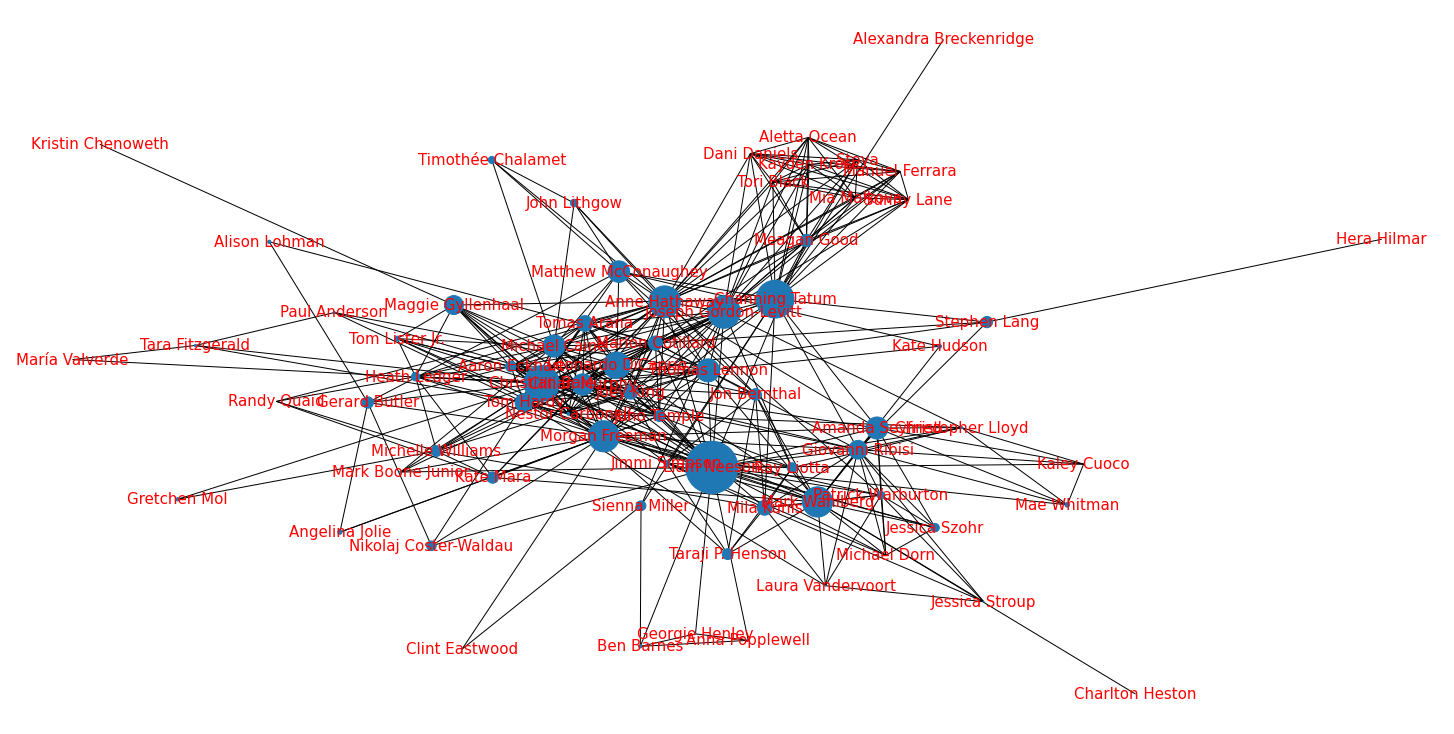



community group:  5
community size:  61


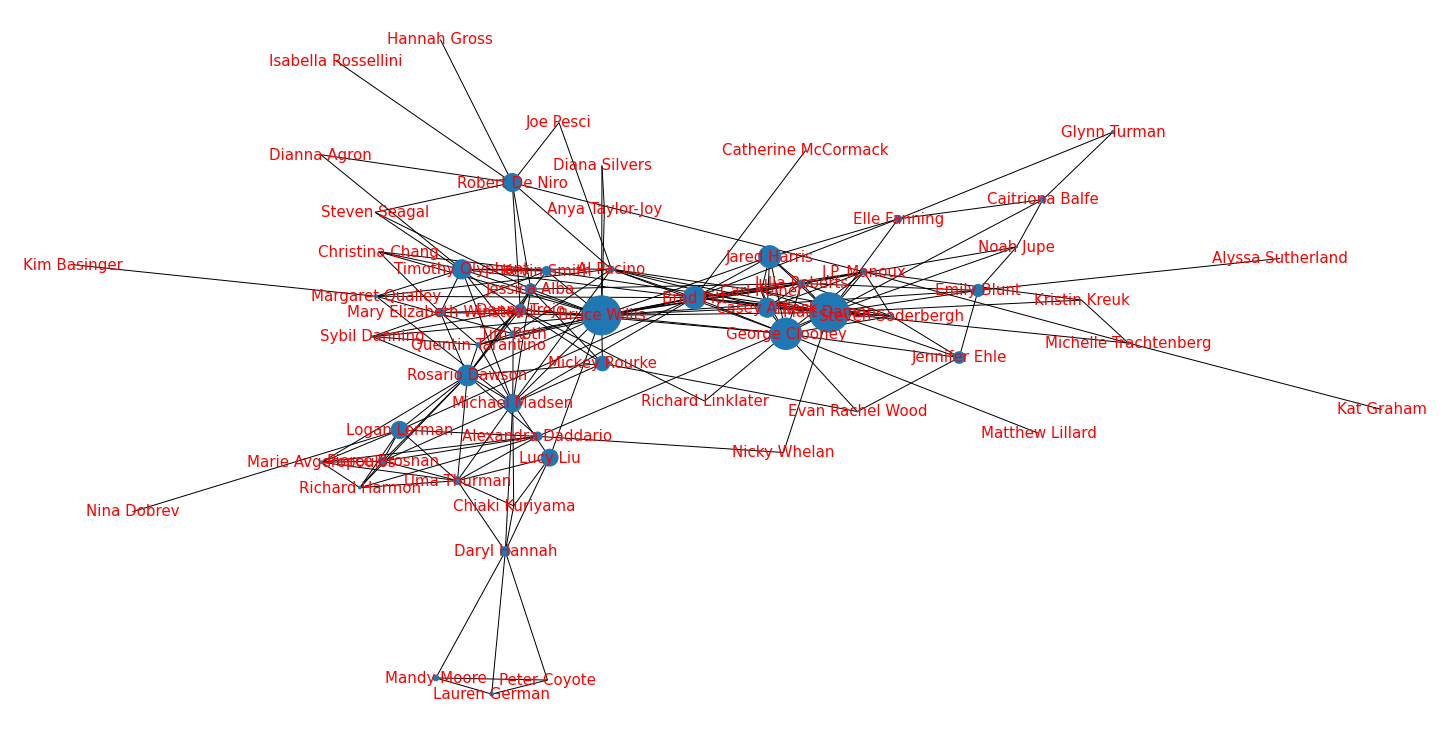



community group:  6
community size:  80


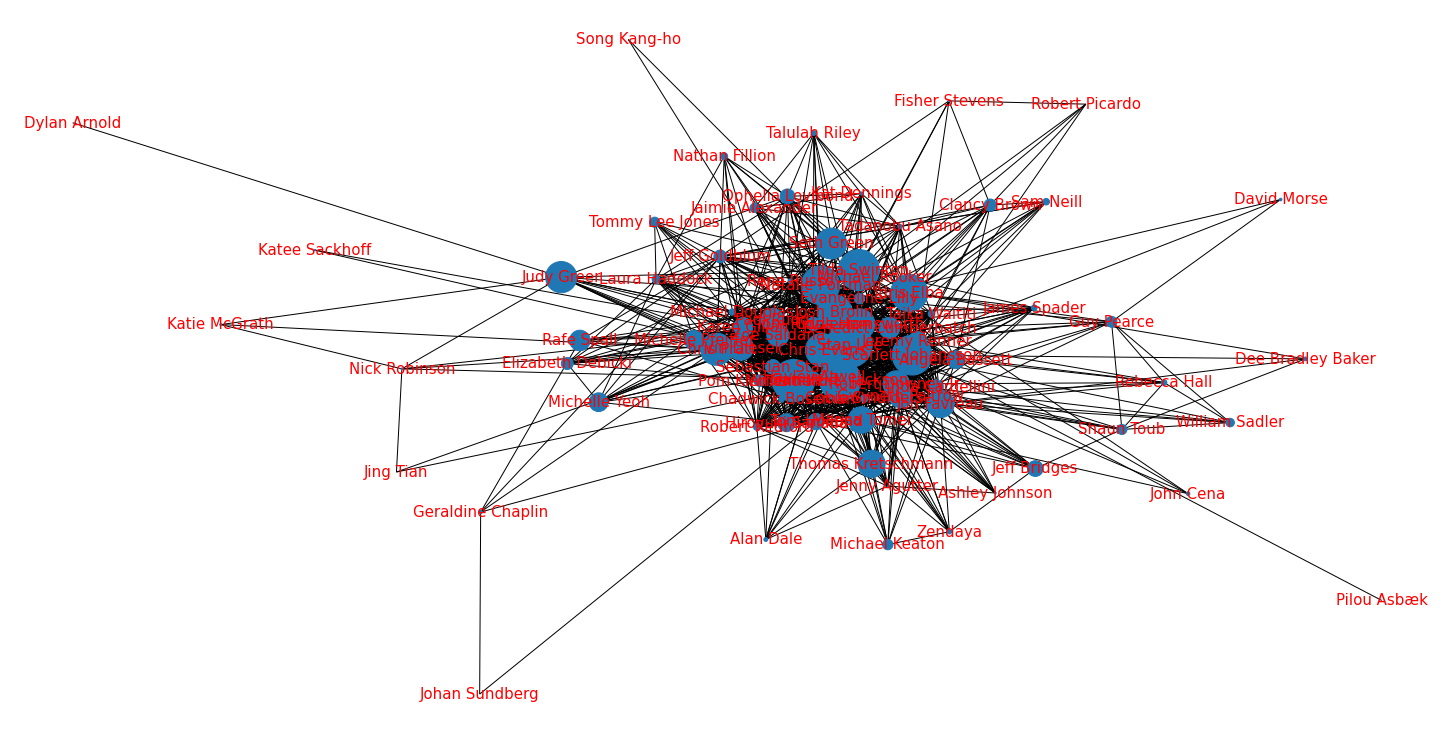

In [153]:
#visualize community group 0, 5, 6
for i in [0,5,6]:

    #create sub_dataframe of each community group
    sub_df = agg.loc[agg['comm_group'] == i]

    #create sub_graph of each community group
    sg = G.subgraph(sub_df.name.tolist())
    mydict = dict(zip(sub_df.name,sub_df.btw_cent))

    #visualize each community group
    print('community group: ', i)
    print('community size: ', len(sub_df.index))

    plt.figure(3,figsize=(20,10)) 
    nx.draw_spring(sg,with_labels=True,font_size=15,nodelist=mydict.keys(), node_size=[v * 100000 for v in mydict.values()],font_color='r')
    plt.show()
    print()
    print()

In [ ]:
#agg sort by num_mov
agg1 = agg.sort_values('num_mov', ascending=False)
agg1.reset_index(drop=True,inplace=True)
agg1.head(20)

,name,num_mov,popularity,comm_group,degree,deg_central,clust_coeff,ev_cent,close_cent,btw_cent
0,Stan Lee,35,11.303,6,139,0.161066,0.515840,0.167772,0.515840,0.020736
1,Samuel L. Jackson,32,24.180,6,133,0.154114,0.505269,0.157390,0.505269,0.017240
2,Liam Neeson,27,20.044,0,128,0.148320,0.505862,0.102711,0.505862,0.027262
3,Matt Damon,27,7.161,5,104,0.120510,0.490620,0.099326,0.490620,0.015551
4,Scarlett Johansson,26,38.998,6,115,0.133256,0.498268,0.142775,0.498268,0.015832
5,Ryan Reynolds,24,22.981,4,88,0.101970,0.484559,0.073942,0.484559,0.008685
6,Brad Pitt,23,20.431,5,76,0.088065,0.475744,0.071257,0.475744,0.005043
7,Johnny Depp,22,31.362,8,70,0.081112,0.457582,0.047224,0.457582,0.006083
8,Channing Tatum,22,8.926,0,82,0.095017,0.479178,0.065168,0.479178,0.014264
9,Morgan Freeman,22,14.994,0,79,0.091541,0.479444,0.064438,0.479444,0.009701


In [ ]:
#agg sort by degree
agg1 = agg.sort_values('degree', ascending=False)
agg1.reset_index(drop=True,inplace=True)
agg1.head(20)

,name,num_mov,popularity,comm_group,degree,deg_central,clust_coeff,ev_cent,close_cent,btw_cent
0,Stan Lee,35,11.303,6,139,0.161066,0.515840,0.167772,0.515840,0.020736
1,Samuel L. Jackson,32,24.180,6,133,0.154114,0.505269,0.157390,0.505269,0.017240
2,Liam Neeson,27,20.044,0,128,0.148320,0.505862,0.102711,0.505862,0.027262
3,Scarlett Johansson,26,38.998,6,115,0.133256,0.498268,0.142775,0.498268,0.015832
4,Josh Brolin,18,8.152,6,109,0.126304,0.501453,0.146333,0.501453,0.012160
5,Matt Damon,27,7.161,5,104,0.120510,0.490620,0.099326,0.490620,0.015551
6,Tilda Swinton,19,8.246,6,101,0.117034,0.492861,0.133810,0.492861,0.016796
7,Chris Hemsworth,18,14.571,6,93,0.107764,0.481316,0.130692,0.481316,0.009411
8,Jon Favreau,18,9.051,6,93,0.107764,0.482932,0.121627,0.482932,0.007509
9,Chris Evans,19,11.212,6,92,0.106605,0.480245,0.124997,0.480245,0.011075


In [ ]:
#agg sort by deg_central
agg1 = agg.sort_values('deg_central', ascending=False)
agg1.reset_index(drop=True,inplace=True)
agg1.head(20)

,name,num_mov,popularity,comm_group,degree,deg_central,clust_coeff,ev_cent,close_cent,btw_cent
0,Stan Lee,35,11.303,6,139,0.161066,0.515840,0.167772,0.515840,0.020736
1,Samuel L. Jackson,32,24.180,6,133,0.154114,0.505269,0.157390,0.505269,0.017240
2,Liam Neeson,27,20.044,0,128,0.148320,0.505862,0.102711,0.505862,0.027262
3,Scarlett Johansson,26,38.998,6,115,0.133256,0.498268,0.142775,0.498268,0.015832
4,Josh Brolin,18,8.152,6,109,0.126304,0.501453,0.146333,0.501453,0.012160
5,Matt Damon,27,7.161,5,104,0.120510,0.490620,0.099326,0.490620,0.015551
6,Tilda Swinton,19,8.246,6,101,0.117034,0.492861,0.133810,0.492861,0.016796
7,Chris Hemsworth,18,14.571,6,93,0.107764,0.481316,0.130692,0.481316,0.009411
8,Jon Favreau,18,9.051,6,93,0.107764,0.482932,0.121627,0.482932,0.007509
9,Chris Evans,19,11.212,6,92,0.106605,0.480245,0.124997,0.480245,0.011075


In [ ]:
#agg sor by clust_coeff
agg1 = agg.sort_values('clust_coeff', ascending=False)
agg1.reset_index(drop=True,inplace=True)
agg1.head(20)

,name,num_mov,popularity,comm_group,degree,deg_central,clust_coeff,ev_cent,close_cent,btw_cent
0,Stan Lee,35,11.303,6,139,0.161066,0.515840,0.167772,0.515840,0.020736
1,Liam Neeson,27,20.044,0,128,0.148320,0.505862,0.102711,0.505862,0.027262
2,Samuel L. Jackson,32,24.180,6,133,0.154114,0.505269,0.157390,0.505269,0.017240
3,Josh Brolin,18,8.152,6,109,0.126304,0.501453,0.146333,0.501453,0.012160
4,Scarlett Johansson,26,38.998,6,115,0.133256,0.498268,0.142775,0.498268,0.015832
5,Tilda Swinton,19,8.246,6,101,0.117034,0.492861,0.133810,0.492861,0.016796
6,Matt Damon,27,7.161,5,104,0.120510,0.490620,0.099326,0.490620,0.015551
7,Jude Law,19,9.619,1,91,0.105446,0.488122,0.081849,0.488122,0.011525
8,Paul Rudd,15,11.977,6,85,0.098494,0.484559,0.118519,0.484559,0.005077
9,Ryan Reynolds,24,22.981,4,88,0.101970,0.484559,0.073942,0.484559,0.008685


In [ ]:
#agg sort by ev_cent
agg1 = agg.sort_values('ev_cent', ascending=False)
agg1.reset_index(drop=True,inplace=True)
agg1.head(20)

,name,num_mov,popularity,comm_group,degree,deg_central,clust_coeff,ev_cent,close_cent,btw_cent
0,Stan Lee,35,11.303,6,139,0.161066,0.515840,0.167772,0.515840,0.020736
1,Samuel L. Jackson,32,24.180,6,133,0.154114,0.505269,0.157390,0.505269,0.017240
2,Josh Brolin,18,8.152,6,109,0.126304,0.501453,0.146333,0.501453,0.012160
3,Scarlett Johansson,26,38.998,6,115,0.133256,0.498268,0.142775,0.498268,0.015832
4,Tilda Swinton,19,8.246,6,101,0.117034,0.492861,0.133810,0.492861,0.016796
5,Chris Hemsworth,18,14.571,6,93,0.107764,0.481316,0.130692,0.481316,0.009411
6,Chris Evans,19,11.212,6,92,0.106605,0.480245,0.124997,0.480245,0.011075
7,Robert Downey Jr.,19,25.548,6,88,0.101970,0.476532,0.123908,0.476532,0.006995
8,Benedict Cumberbatch,15,16.232,6,80,0.092700,0.472101,0.123790,0.472101,0.004396
9,Jeremy Renner,17,9.767,6,80,0.092700,0.477587,0.121971,0.477587,0.003349


In [ ]:
#agg sort by close_cent
agg1 = agg.sort_values('close_cent', ascending=False)
agg1.reset_index(drop=True,inplace=True)
agg1.head(20)

,name,num_mov,popularity,comm_group,degree,deg_central,clust_coeff,ev_cent,close_cent,btw_cent
0,Stan Lee,35,11.303,6,139,0.161066,0.515840,0.167772,0.515840,0.020736
1,Liam Neeson,27,20.044,0,128,0.148320,0.505862,0.102711,0.505862,0.027262
2,Samuel L. Jackson,32,24.180,6,133,0.154114,0.505269,0.157390,0.505269,0.017240
3,Josh Brolin,18,8.152,6,109,0.126304,0.501453,0.146333,0.501453,0.012160
4,Scarlett Johansson,26,38.998,6,115,0.133256,0.498268,0.142775,0.498268,0.015832
5,Tilda Swinton,19,8.246,6,101,0.117034,0.492861,0.133810,0.492861,0.016796
6,Matt Damon,27,7.161,5,104,0.120510,0.490620,0.099326,0.490620,0.015551
7,Jude Law,19,9.619,1,91,0.105446,0.488122,0.081849,0.488122,0.011525
8,Paul Rudd,15,11.977,6,85,0.098494,0.484559,0.118519,0.484559,0.005077
9,Ryan Reynolds,24,22.981,4,88,0.101970,0.484559,0.073942,0.484559,0.008685


In [ ]:
#agg sort by btw_cent
agg1 = agg.sort_values('btw_cent', ascending=False)
agg1.reset_index(drop=True,inplace=True)
agg1.head(20)

,name,num_mov,popularity,comm_group,degree,deg_central,clust_coeff,ev_cent,close_cent,btw_cent
0,Liam Neeson,27,20.044,0,128,0.148320,0.505862,0.102711,0.505862,0.027262
1,Jason Statham,21,40.672,9,62,0.071842,0.449479,0.039266,0.449479,0.022295
2,Stan Lee,35,11.303,6,139,0.161066,0.515840,0.167772,0.515840,0.020736
3,William Hurt,13,9.990,6,81,0.093859,0.477059,0.118395,0.477059,0.017955
4,Samuel L. Jackson,32,24.180,6,133,0.154114,0.505269,0.157390,0.505269,0.017240
5,Tilda Swinton,19,8.246,6,101,0.117034,0.492861,0.133810,0.492861,0.016796
6,Scarlett Johansson,26,38.998,6,115,0.133256,0.498268,0.142775,0.498268,0.015832
7,Dwayne Johnson,21,43.057,9,71,0.082271,0.468258,0.049815,0.468258,0.015761
8,Matt Damon,27,7.161,5,104,0.120510,0.490620,0.099326,0.490620,0.015551
9,Bruce Willis,22,35.623,5,79,0.091541,0.481854,0.059854,0.481854,0.015287
